## Run gear experiment
#### Input gear metadata (at least gear number) and run experiment to add test data to dictionary

In [1]:
import os
import pickle
import numpy as np

from Experiment_Utils import Run_Experiment,  plot_dict_key

In [ ]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Run_Experiment, plot_dict_key

In [7]:
file_dir = '/home/gmc/Python/Mod_DOE'
file_name = 'Taguchi_test_dict.pkl'
Experiment_Runtime = 5 #s
Num_Experiment = 6 # trials
Direction = False # start CW

In [8]:
# Set design number - FOR TAGUCHI DESIGNS
Gear_Design_Number = 5

In [9]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [10]:
raise RuntimeError("MAKE SURE YOU UPDATED THE GEAR NUMBER!!")

RuntimeError: MAKE SURE YOU UPDATED THE GEAR NUMBER!!

In [12]:
in_dict = starting_dict.copy()
in_key = 'Taguchi_Design_' + str(Gear_Design_Number)
for i in range(Num_Experiment):
    in_dict = Run_Experiment(in_dict, Experiment_Runtime, in_key, Direction)
    Direction = not Direction

Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting load vals, shape: 160
Posting current vals, shape: 135
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 seconds ...
Posting load vals, shape: 177
Posting current vals, shape: 111
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting load vals, shape: 156
Posting current vals, shape: 167
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 seconds ...
Posting load vals, shape: 162
Posting current vals, shape: 951
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CW for 5 seconds ...
Posting current vals, shape: 284
Posting load vals, shape: 169
Key exists, appending
Succeeded to open the port
Succeeded to change the baudrate
Running motor CCW for 5 seconds ...
Po

### We can view the data from the latest (nth) test

In [13]:
# load latest values
update_dict = in_dict
key = list(update_dict.keys())[-1]


/home/gmc/Python/Mod_DOE/Experiment_Utils.py:260: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(dxt_time, dxt_percent, c=color1[i], label='torque')
/home/gmc/Python/Mod_DOE/Experiment_Utils.py:261: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(current_time, current_vals, c=color2[i], label='current')


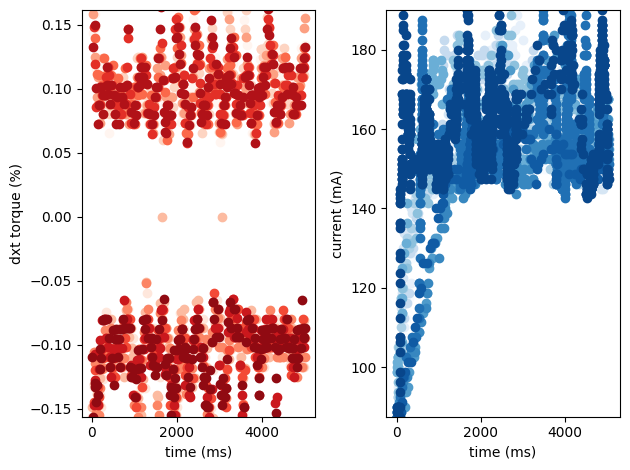

In [14]:
# plot - TODO: pull the max torque/current vals from a function similar to plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
plot_dict_key(update_dict, key)

In [15]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [10]:
os.chdir(file_dir)
pickle.dump(in_dict,open(file_name, 'wb'))